![Heart](heart_image.jpg)

# Classifying heart disease

The dataset was obtained from Kaggle https://www.kaggle.com/ronitf/heart-disease-uci <br>
The original source of this dataset is https://archive.ics.uci.edu/ml/datasets/Heart+Disease as is mentioned on the Kaggle page.

## Metadata

After spending some time on the original source of the data, I found out that this is a pretty old dataset. Nonetheless, we might be able to learn and conclude something from this data.

The original source mentions that there are 75 attributes/features on the original dataset but most published experiments only used a subset of 14 features. Our goal here is to build a model that is able to predict if a patient is suffering from heart disease or not. (A classic Classification Problem)

Let's define what attributes are used in this dataset:

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (target) (the predicted class) 

A more elaborate explanation:<br>
1. `cp` refers to chest pain and has four levels:
    - 0: typical angina 
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic <br>
Angina is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease. {https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373}

2. `trestbps` is the resting blood pressure (in mm Hg on admission to the hospital) <br>
     If your blood pressure is higher than 120/80, you could be at risk for heart disease. {https://utswmed.org/medblog/high-blood-pressure-heart-disease/}
     
3. `chol`: serum cholestoral in mg/dl

4. `restecg`: resting electrocardiographic results has 3 levels:
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    {https://pubmed.ncbi.nlm.nih.gov/8665372/}

5. `thalach`: maximum heart rate achieved 

6. `exang`: exercise induced angina (1 = yes; 0 = no) {https://pubmed.ncbi.nlm.nih.gov/4068968/}

7. `oldpeak`: ST depression induced by exercise relative to rest

8. `slope`: the slope of the peak exercise ST segment
    - 0: upsloping
    - 1: flat
    - 2: downsloping

9. `ca`: number of major vessels (0-3) colored by flourosopy 

10. `thal`: Thallium stress test: 3 = normal; 6 = fixed defect; 7 = reversable defect 
    {https://www.healthline.com/health/thallium-stress-test}

11. `fbs`: fasting blood sugar 
    (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

## To-do

#### 1. Load and Explore 
    
#### 2. Clean and Preprocess 
    
#### 3. Perform Exploratory Data Analysis 
    
#### 4. Build and Evaluate Model 
    
#### 5. Explain Model Results and Conclude 

In [229]:
# but first, necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For model building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import classification_report

## 1. Loading and Exploring the Data

In [34]:
heart = pd.read_csv('heart.csv')

In [6]:
heart.shape

(303, 14)

In [4]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
heart.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [10]:
print("The study on this data is done on people  between {0} and {1} of age.".format(
    heart['age'].min(),heart['age'].max() ))
print("The shape of this dataset is {}".format(heart.shape))

The study on this data is done on people  between 29 and 77 of age.
The shape of this dataset is (303, 14)


## 2. Clean and Preprocess the data

1. Let's deal with the missing values first.
Fortunately, there are no missing values here.

In [11]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

2. We may want to change the names of the columns for better readability and for visualization.

In [35]:
col_name_map = {'cp': 'chest_pain_type',
                'trestbps': 'rest_bp',
                'chol': 'serum_cholestrol',
                'fbs': 'fasting_blood_sugar',
                'restecg': 'rest_ecg_level',
                'thalach': 'max_heart_rate',
                'exang': 'exercise_induced_angina',
                'oldpeak': 'st_depression',
                'slope': 'st_slope_type',
                'ca': 'major_vessel_count',
                'thal': 'thalium_stress_test_result',
                'target': 'diagnosis'}
heart.rename(mapper=col_name_map, axis=1, inplace=True)

Target has been renamed to ***diagnosis*** (0=no, 1=yes)

In [36]:
heart.head()

age  sex  chest_pain_type  rest_bp  serum_cholestrol  fasting_blood_sugar  \
0   63    1                3      145               233                    1   
1   37    1                2      130               250                    0   
2   41    0                1      130               204                    0   
3   56    1                1      120               236                    0   
4   57    0                0      120               354                    0   

   rest_ecg_level  max_heart_rate  exercise_induced_angina  st_depression  \
0               0             150                        0            2.3   
1               1             187                        0            3.5   
2               0             172                        0            1.4   
3               1             178                        0            0.8   
4               1             163                        1            0.6   

   st_slope_type  major_vessel_count  thalium_stress_test_result  diagnosis  
0              0                   0                           1          1  
1              0                   0                           2          1  
2              2                   0                           2          1  
3              2                   0                           2          1  
4              2                   0                           2          1

3. Let's change the categorical columns to make it better to understand what we're dealing with.

In [47]:
# Sex Column (1 = male, 0=female)
heart.loc[heart['sex'] == 1, 'sex'] = 'male'
heart.loc[heart['sex'] == 0, 'sex'] = 'female'

# chest_pain_type
heart.loc[heart['chest_pain_type'] == 0, 'chest_pain_type'] = 'Typical Angina'
heart.loc[heart['chest_pain_type'] == 1, 'chest_pain_type'] = 'Atypical Angina'
heart.loc[heart['chest_pain_type'] == 2, 'chest_pain_type'] = 'Non-anginal Pain'
heart.loc[heart['chest_pain_type'] == 3, 'chest_pain_type'] = 'Asymptomatic Pain'

# fasting_blood_sugar --> fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
heart.loc[heart['fasting_blood_sugar'] == 0, 'fasting_blood_sugar'] = 'Lower than 120 mg/dl'
heart.loc[heart['fasting_blood_sugar'] == 1, 'fasting_blood_sugar'] = 'Higher than 120 mg/dl'

# rest_ecg_level
heart.loc[heart['rest_ecg_level'] == 0, 'rest_ecg_level'] = 'Normal'
heart.loc[heart['rest_ecg_level'] == 1, 'rest_ecg_level'] = 'ST-T Wave Abnormality'
heart.loc[heart['rest_ecg_level'] == 2, 'rest_ecg_level'] = 'Left ventricular hypertrophy'

# exercise_enduced_angina --> (1=yes, 0=no)
heart.loc[heart['exercise_induced_angina'] == 0, 'exercise_induced_angina'] = 'No'
heart.loc[heart['exercise_induced_angina'] == 1, 'exercise_induced_angina'] = 'Yes'

# st_slope_type
heart.loc[heart['st_slope_type'] == 0, 'st_slope_type'] = 'Upsloping'
heart.loc[heart['st_slope_type'] == 1, 'st_slope_type'] = 'Flat'
heart.loc[heart['st_slope_type'] == 2, 'st_slope_type'] = 'Downsloping'

# thalium_stress_test_result
heart.loc[heart['thalium_stress_test_result'] == 0, 'thalium_stress_test_result'] = 'Null'
heart.loc[heart['thalium_stress_test_result'] == 1, 'thalium_stress_test_result'] = 'Fixed Defect'
heart.loc[heart['thalium_stress_test_result'] == 2, 'thalium_stress_test_result'] = 'Normal'
heart.loc[heart['thalium_stress_test_result'] == 3, 'thalium_stress_test_result'] = 'Reversible Defect'

In [48]:
heart.head()

age     sex    chest_pain_type  rest_bp  serum_cholestrol  \
0   63    male  Asymptomatic Pain      145               233   
1   37    male   Non-anginal Pain      130               250   
2   41  female    Atypical Angina      130               204   
3   56    male    Atypical Angina      120               236   
4   57  female     Typical Angina      120               354   

     fasting_blood_sugar         rest_ecg_level  max_heart_rate  \
0  Higher than 120 mg/dl                 Normal             150   
1   Lower than 120 mg/dl  ST-T Wave Abnormality             187   
2   Lower than 120 mg/dl                 Normal             172   
3   Lower than 120 mg/dl  ST-T Wave Abnormality             178   
4   Lower than 120 mg/dl  ST-T Wave Abnormality             163   

  exercise_induced_angina  st_depression st_slope_type  major_vessel_count  \
0                      No            2.3     Upsloping                   0   
1                      No            3.5     Upsloping                   0   
2                      No            1.4   Downsloping                   0   
3                      No            0.8   Downsloping                   0   
4                     Yes            0.6   Downsloping                   0   

  thalium_stress_test_result  diagnosis  
0               Fixed Defect          1  
1                     Normal          1  
2                     Normal          1  
3                     Normal          1  
4                     Normal          1

The data now looks more clear to understand and visualize. Onto EDA!!

## 3. Exploratory Data Analysis

Let's convert the categorical values to their respective data types.

In [51]:
cat_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg_level',
            'exercise_induced_angina', 'st_slope_type', 'thalium_stress_test_result']
for col in cat_cols:
    heart[col] = heart[col].astype('object')
heart.dtypes

age                             int64
sex                            object
chest_pain_type                object
rest_bp                         int64
serum_cholestrol                int64
fasting_blood_sugar            object
rest_ecg_level                 object
max_heart_rate                  int64
exercise_induced_angina        object
st_depression                 float64
st_slope_type                  object
major_vessel_count              int64
thalium_stress_test_result     object
diagnosis                       int64
dtype: object

- Count Plots

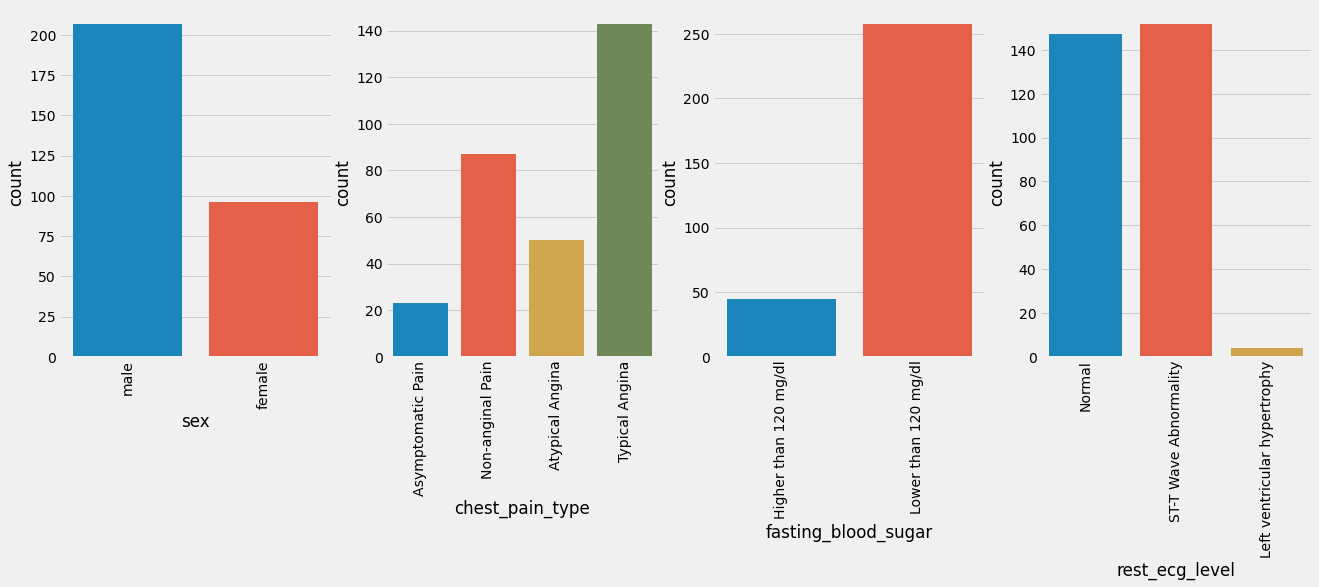

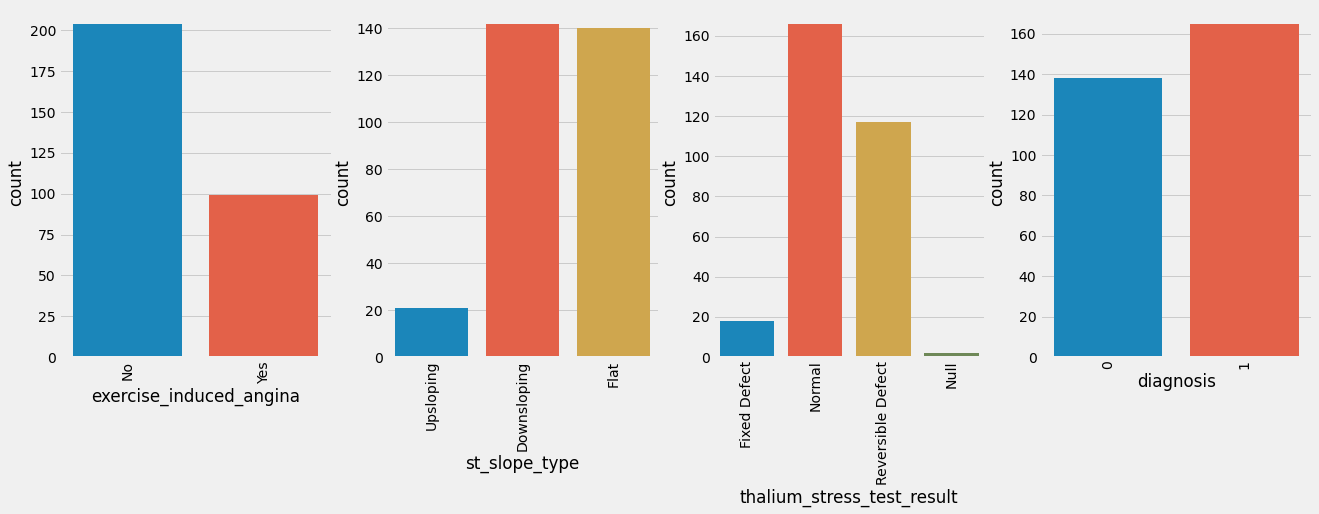

In [126]:
col_to_plot = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg_level',
               'exercise_induced_angina', 'st_slope_type', 'thalium_stress_test_result', 'diagnosis']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,6))
for col, ax in zip(col_to_plot, axes):
    sns.countplot(x=col, data=heart, ax=ax)
    ax.tick_params('x', labelrotation=90)

fig2, axes2 = plt.subplots(nrows=1, ncols=4, figsize=(20,6))
for col, ax in zip(col_to_plot[4:], axes2):
    sns.countplot(x=col, data=heart, ax=ax)
    ax.tick_params('x', labelrotation=90)

The count of ***diagnosis*** feature are somewhat identical. So, we can say we have a balanced dataset.

### Now let's take a look at what feature affects the diagnosis of heart disease.

In [133]:
categorical = []
continuous = []
# Those features with more than 5 unique values are continuous else they are categorical (in this context)

for column in heart.columns:
    if(len(heart[column].unique()) > 5):
        continuous.append(column)
    else:
        categorical.append(column)

In [134]:
categorical.pop()
categorical

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg_level',
 'exercise_induced_angina',
 'st_slope_type',
 'major_vessel_count',
 'thalium_stress_test_result']

In [80]:
continuous

['age', 'rest_bp', 'serum_cholestrol', 'max_heart_rate', 'st_depression']

### For Categorical Variables

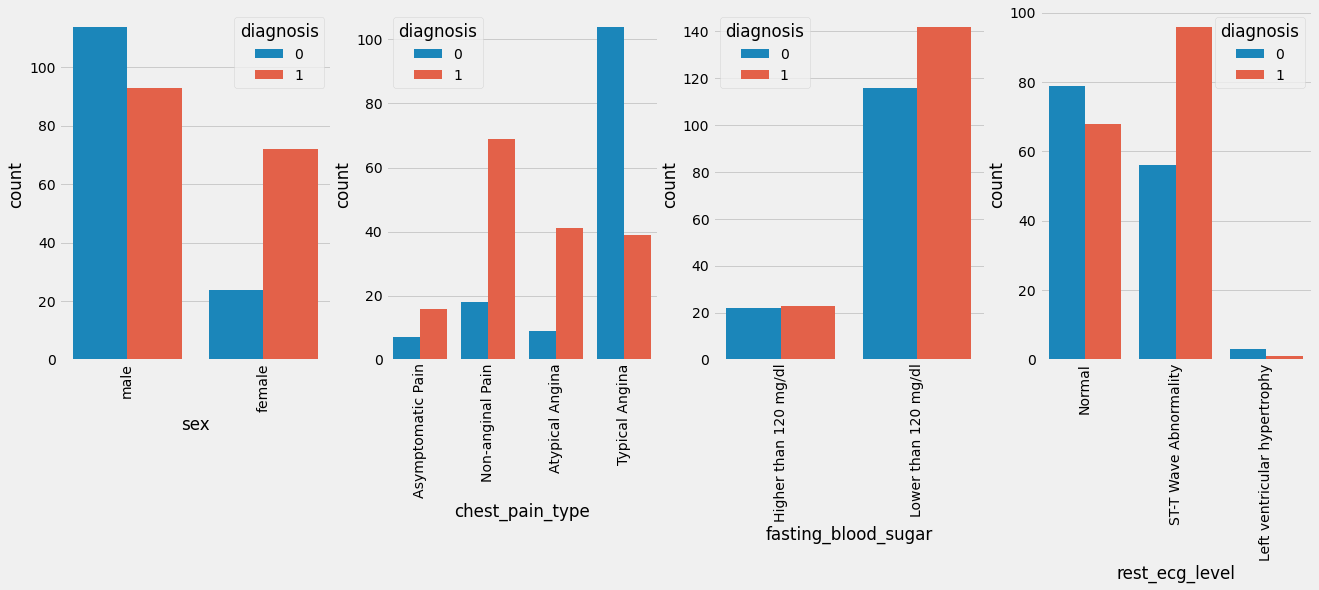

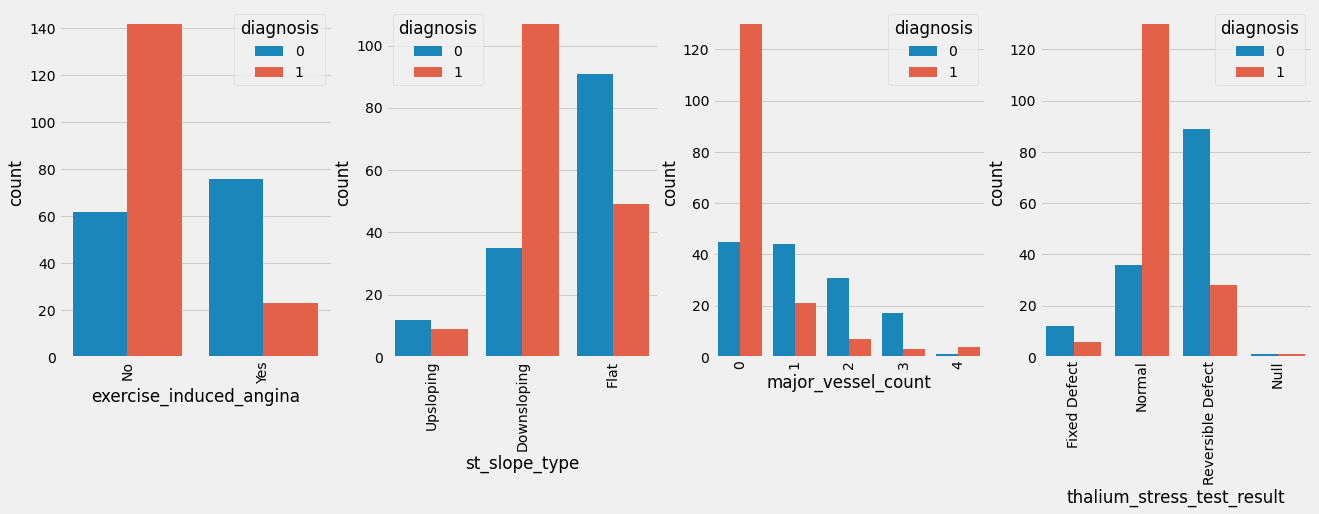

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,6))
for col, ax in zip(categorical, axes):
    sns.countplot(x=col, data=heart, ax=ax, hue='diagnosis')
    ax.tick_params('x', labelrotation=90)

fig2, axes2 = plt.subplots(nrows=1, ncols=4, figsize=(20,6))
for col, ax in zip(categorical[4:], axes2):
    sns.countplot(x=col, data=heart, ax=ax, hue='diagnosis')
    ax.tick_params('x', labelrotation=90)

#### Below insights can be gathered from the above graphs: <br>
`*Disclaimer: This data is very small and outdated. There can be bias in count of the data which will heavily influence the insight gathered from it. Please note that the insights may not be 100% accurate.*`
1. Male are likely to suffer from heart disease than women (maybe this is wrong, it depends on the data)
2. People who experience Non-Anginal Pain are more likely to be diagnosed with heart disease.
3. People with fasting blood sugar less than 120 mg/dl are more likely to be diagnosed with the disease.(This Data is somewhat wrong, my guess!)<br>
   *People with a fasting blood sugar level of 100-125 mg/dl had an adjusted nearly 300% increase higher risk of having coronary heart disease than people with a level below 79 mg/dl.* From: {http://www.diabetesincontrol.com/fasting-blood-sugar-above-90-puts-you-at-risk-of-heart-disease/}
4. Patients whose ECG level has ST-Wave Abnormality are likely to be diagnosed.
5. People who suffer from exercise induced angina are less likely to be diagnosed with heart disease.
6. Those who have more major blood vessels are less likely to be diagnosed with heart disease.<br>
    *I guess this is because, the more vessels you have, the more blood circulation and hence healthier heart.*

## For continuous variables

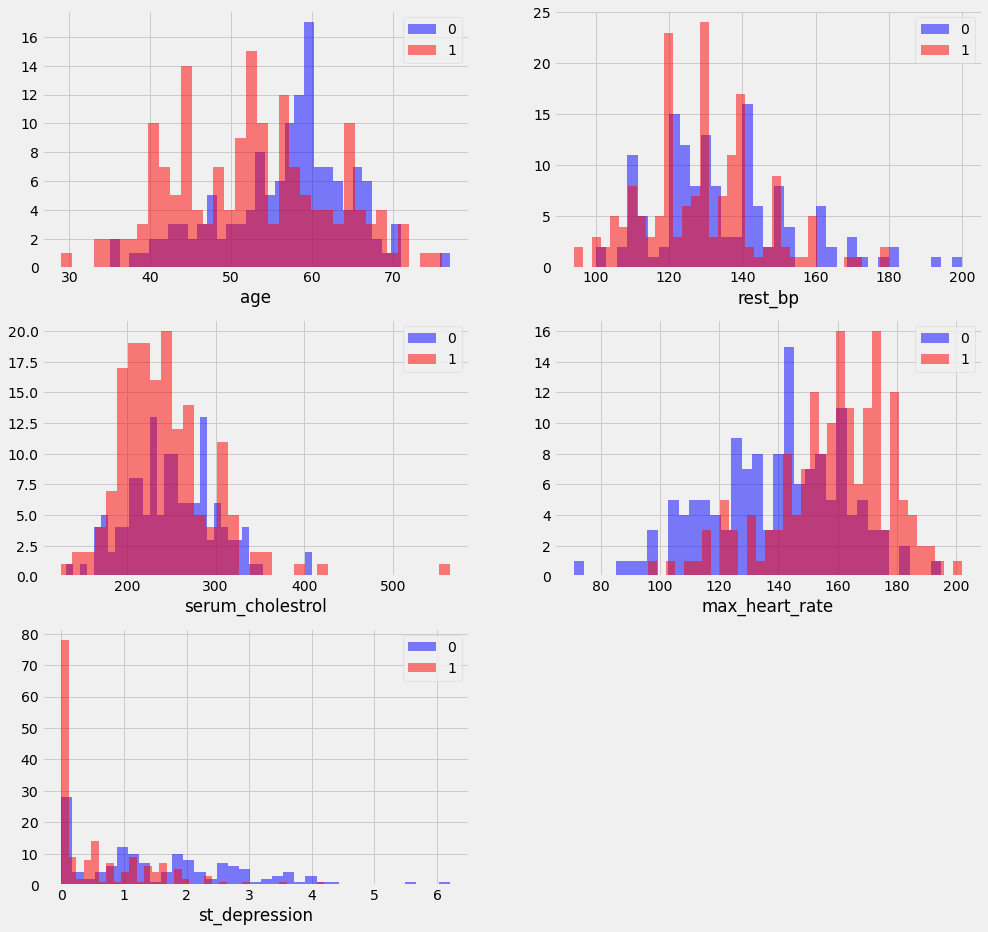

In [149]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continuous, 1):
    plt.subplot(3, 2, i)
    heart[heart["diagnosis"] == 0][column].hist(bins=35, color='blue', label='0', alpha=0.5)
    heart[heart["diagnosis"] == 1][column].hist(bins=35, color='red', label='1', alpha=0.5)
    plt.legend()
    plt.xlabel(column)

#### Below insights can be gathered from the above graphs: <br>
`*Disclaimer: This data is very small and outdated. There can be bias in count of the data which will heavily influence the insight gathered from it. Please note that the insights may not be 100% accurate.*`
1. Any aged person can be diagnosed with heart disease. But, it is most common after 40's.
2. People with high blood pressure have higher chances to be diagnosed with heart disease.
3. More cholestrol leads to heart disease.
4. People with higher heart rate may be more likely to be diagnosed with this disease.<br>
`st_depression` not to be confused with mental condition.

### Age and Maximum heart rate

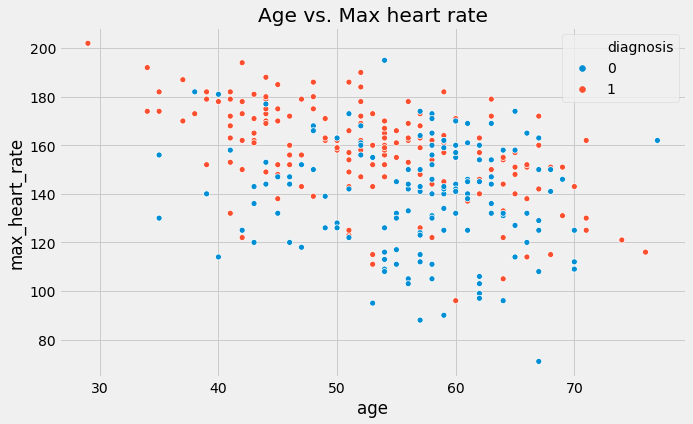

In [154]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='max_heart_rate', data=heart, hue='diagnosis')
plt.title("Age vs. Max heart rate")
plt.show()

## Correlation Plots

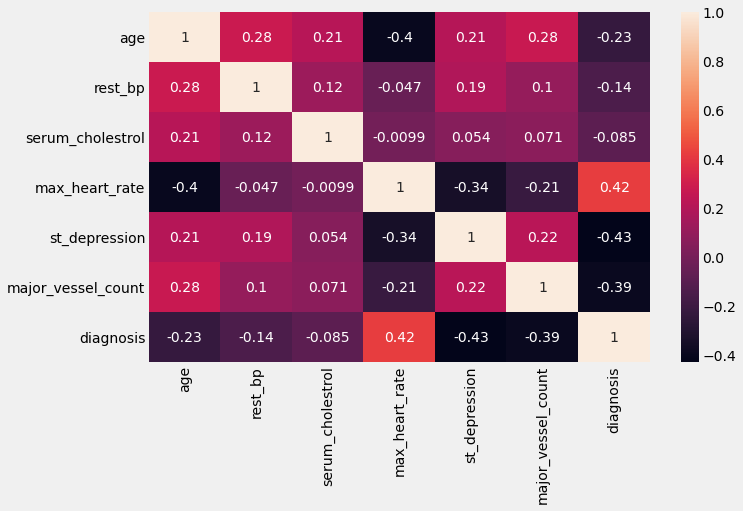

In [157]:
corr = heart.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)

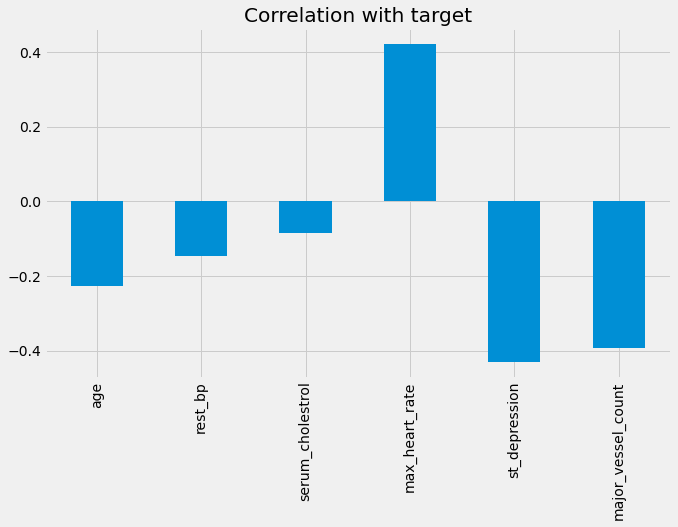

In [161]:
heart.drop('diagnosis', axis=1).corrwith(heart.diagnosis).plot(kind='bar', grid=True, figsize=(10, 6), 
                                                   title="Correlation with target")

All continuous variables are significantly correlated with the target variable. `max_heart_rate` is highly correlated.

# 4. Model Building

In this section, we will be building different models, test them, tune their parameters and select one model that has the most reliability. Some models we'll be using are: <br>
    1. Logistic Regression
    2. SVC
    3. k-NN Classifier
    4. Random Forest Classifier
We will first build models without hyperparameter tuning and then choose the model that has the most accuracy among them. After that, we will evaluate the model after Parameter tuning.

Before building our model, let's get our data ready for the model to ingest. We will deal with categorical values and create dummy variables from them. We also need to separate the target variable from the dataset.

#### Preprocessing before model building

In [163]:
# Separating target variable
X = heart.drop('diagnosis', axis=1)
y = heart.diagnosis

In [167]:
# Getting dummies from categorical Values
X = pd.get_dummies(X)

In [168]:
X.head()

age  rest_bp  serum_cholestrol  max_heart_rate  st_depression  \
0   63      145               233             150            2.3   
1   37      130               250             187            3.5   
2   41      130               204             172            1.4   
3   56      120               236             178            0.8   
4   57      120               354             163            0.6   

   major_vessel_count  sex_female  sex_male  \
0                   0           0         1   
1                   0           0         1   
2                   0           1         0   
3                   0           0         1   
4                   0           1         0   

   chest_pain_type_Asymptomatic Pain  chest_pain_type_Atypical Angina  ...  \
0                                  1                                0  ...   
1                                  0                                0  ...   
2                                  0                                1  ...   
3                                  0                                1  ...   
4                                  0                                0  ...   

   rest_ecg_level_ST-T Wave Abnormality  exercise_induced_angina_No  \
0                                     0                           1   
1                                     1                           1   
2                                     0                           1   
3                                     1                           1   
4                                     1                           0   

   exercise_induced_angina_Yes  st_slope_type_Downsloping  st_slope_type_Flat  \
0                            0                          0                   0   
1                            0                          0                   0   
2                            0                          1                   0   
3                            0                          1                   0   
4                            1                          1                   0   

   st_slope_type_Upsloping  thalium_stress_test_result_Fixed Defect  \
0                        1                                        1   
1                        1                                        0   
2                        0                                        0   
3                        0                                        0   
4                        0                                        0   

   thalium_stress_test_result_Normal  thalium_stress_test_result_Null  \
0                                  0                                0   
1                                  1                                0   
2                                  1                                0   
3                                  1                                0   
4                                  1                                0   

   thalium_stress_test_result_Reversible Defect  
0                                             0  
1                                             0  
2                                             0  
3                                             0  
4                                             0  

[5 rows x 26 columns]

### Let's Scale the data using Standard Scaler

In [175]:
# Scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Looks good. Now let's split the data into test and training sets.

In [170]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [172]:
# Let's write a function to make it easy to compare models
def model_accuracy(estimator, X, y, X_train, X_test, y_train, y_test):
    cv_score = cross_val_score(estimator, X, y, cv=10, n_jobs=-1).mean()
    print("Mean cv score: {:.2f}".format(cv_score))
    
    clf = estimator.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    print("Accuracy Score: {:.2f}".format(score))

## 1. Logistic Regression

In [187]:
log_reg = LogisticRegression()
model_accuracy(log_reg, X, y, X_train, X_test, y_train, y_test)

Mean cv score: 0.82
Accuracy Score: 0.84


## 2. k-NN Classifier 

In [188]:
knn = KNeighborsClassifier()
model_accuracy(knn, X, y, X_train, X_test, y_train, y_test)

Mean cv score: 0.83
Accuracy Score: 0.86


## 3. SVC

In [189]:
svc = SVC()
model_accuracy(svc, X, y, X_train, X_test, y_train, y_test)

Mean cv score: 0.82
Accuracy Score: 0.83


## 4. Random Forest Classifier

In [190]:
rf = RandomForestClassifier(max_depth=5)
model_accuracy(rf, X, y, X_train, X_test, y_train, y_test)

Mean cv score: 0.84
Accuracy Score: 0.88


Overall, RandomForestClassifier model has a good performence both on the cross validation and Accuracy. So, we will choose **RandomForestClassifier** and continue to improve it with Hyperparameter Tuning.

## Parameter Tuning on RandomForest Model

First, we will use `RandomizedSearchCV` to find the most promising hyperparameters and build upon that result.

In [195]:
# Let's split our data again
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [196]:
# Here, we define the parameters to sample from
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 100, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Creating parameter grid
random_param_grid = {'n_estimators': n_estimators,
                     'max_features': max_features,
                     'max_depth': max_depth,
                     'min_samples_split': min_samples_split,
                     'min_samples_leaf': min_samples_leaf,
                     'bootstrap': bootstrap}


### Training RandomSearchCV

In [198]:
# define base model
forest = RandomForestClassifier()

# Random search of parameters
rf_random = RandomizedSearchCV(estimator=forest, param_distributions=random_param_grid, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

The best parameters can be viewed.

In [199]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

Let us evaluate if random search really yielded a better result.

In [203]:
forest.fit(X_train, y_train)
print("Base Model Score: {:.2f}".format(forest.score(X_test, y_test)))

Base Model Score: 0.84


In [204]:
print("Random Model Score: {:.2f}".format(rf_random.score(X_test, y_test)))

Random Model Score: 0.86


Random Model has some significant improvement over the Base Model. Now we will perform grid search on the best parameters yielded by the randomsearch.

## GridSearchCV

In [207]:
# Define parameter grid
param_grid_search = {'bootstrap': [True],
                     'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
                     'min_samples_split': [2, 3, 4],
                     'min_samples_leaf': [1, 2, 3],
                     'max_features': ['auto'],
                     'max_depth': [80, 85, 90, 95, 100]}

In [208]:
# define base model for GridSearch
rf = RandomForestClassifier()

#Instantiate grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_search, cv=3, n_jobs=-1, verbose=2)

# Fit the grid Search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

Let's Look at the best Parameters

In [211]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [212]:
grid_search.score(X_test, y_test)

0.868421052631579

About the same score, but minimal improvement.

Now, Let's create a model with the above parameters.

In [213]:
best_forest = RandomForestClassifier(bootstrap=True, max_depth=90, max_features='auto',
                                    min_samples_leaf=2, min_samples_split=4, n_estimators=100)
best_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [214]:
best_forest.score(X_test, y_test)

0.868421052631579

## Let's Evaluate our Model

1. Confusion Matrix

In [216]:
y_predict = best_forest.predict(X_test)
y_pred_quant = best_forest.predict_proba(X_test)[:, 1]
y_pred_bin = best_forest.predict(X_test)

In [218]:
confusion_mat = confusion_matrix(y_test, y_pred_bin)

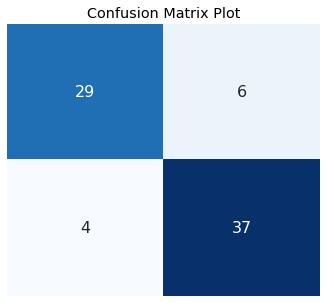

In [228]:
# Plot confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(confusion_mat)
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, cbar=False, cmap='Blues',annot_kws={"size": 16}, xticklabels='', yticklabels='')
plt.title("Confusion Matrix Plot")
plt.show()

**True Positive (TP) = 29** <br>
**True Negative (TN) = 37**<br>
**False Positive (FP) = 4**<br>
**False Negative (FN) = 6**<br>

This means that:
- 29 cases were predicted Positive and they were Positive
- 37 cases were predicted Negative and they were Negative
- 4 cases were predicted Positive but they were Negative
- 6 cases were predicted Negative but they were Positive

Let's Calculate Precision, Recall and F1-Score.

In [230]:
print(classification_report(y_test, y_pred_bin))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



## AUC-ROC curve

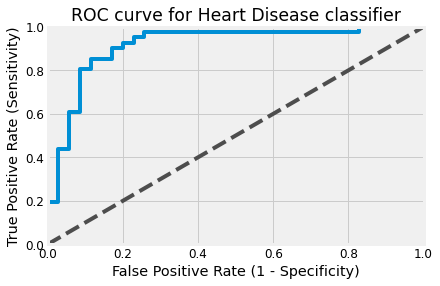

In [232]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Let's calculate the auc value also.

In [235]:
print("The auc score: {:.2f}".format(auc(fpr, tpr)))

The auc score: 0.92


This auc score is pretty good for our model because, higher the auc score, more the chances of predicting 0's as 0's and 1's as 1's. <br>
As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

## 5. Model Explanation and Conclusion

We can conclude that our model did reasonably well in prediction heart disease cases by looking at precision scores, confusion matrix and auc scores. We could have done well if we used deep learning or if we had more data to work with.<br> Using hyperparameter tuning we tuned our model to best fit the data and gained a little improvement over the previous result.